In [1]:
# import pandas as pd for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('CHD.csv')

In [6]:
# retrieve all labels and store in a list
columns_df = list(df.columns.values)
# iterate over the list to print all unique values of each column in the dataframe
for column in columns_df:
    print(column, ':', str(df[column].unique()))

CHD : ['No' 'Yes']
HighBP : ['Yes' 'No']
HighChol : ['Yes' 'No']
CholCheck : ['Yes' 'No']
BMI : [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker : ['Yes' 'No']
Stroke : ['No' 'Yes']
Diabetes : ['No' 'No, borderline diabetes' 'Yes']
PhysActivity : ['No' 'Yes']
Fruits : ['No' 'Yes']
Veggies : ['Yes' 'No']
HvyAlcoholConsump : ['No' 'Yes']
AnyHealthcare : ['Yes' 'No']
NoDocbcCost : ['No' 'Yes']
GenHlth : ['Excellent' 'Good' 'Fair' 'Very good' 'Poor']
MentHlth : [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth : [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk : ['Yes' 'No']
Sex : ['Female' 'Male']
Age : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50

In [7]:
# list of numerical features
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['BMI', 'MentHlth', 'PhysHlth', 'Education', 'Income'], dtype='object')

In [8]:
# list of categorical features
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['CHD', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')

In [9]:
# encode 'AgeCategory' column
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['Age'] = df['Age'].apply(lambda x: encode_AgeCategory[x])
df['Age'] = df['Age'].astype(int)
df['Age']

0         57
1         80
2         67
3         77
4         42
          ..
253675    32
253676    57
253677    77
253678    67
253679    47
Name: Age, Length: 253680, dtype: int32

In [10]:
df.describe()[1:][list(numeric_features)].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.382364,6.608694,12.000000,24.000000,27.000000,31.000000,98.000000
MentHlth,3.184772,7.412847,0.000000,0.000000,0.000000,2.000000,30.000000
PhysHlth,4.242081,8.717951,0.000000,0.000000,0.000000,3.000000,30.000000
Education,5.050434,0.985774,1.000000,4.000000,5.000000,6.000000,6.000000
Income,6.053875,2.071148,1.000000,5.000000,7.000000,8.000000,8.000000


ValueError: num must be 1 <= num <= 15, not 16

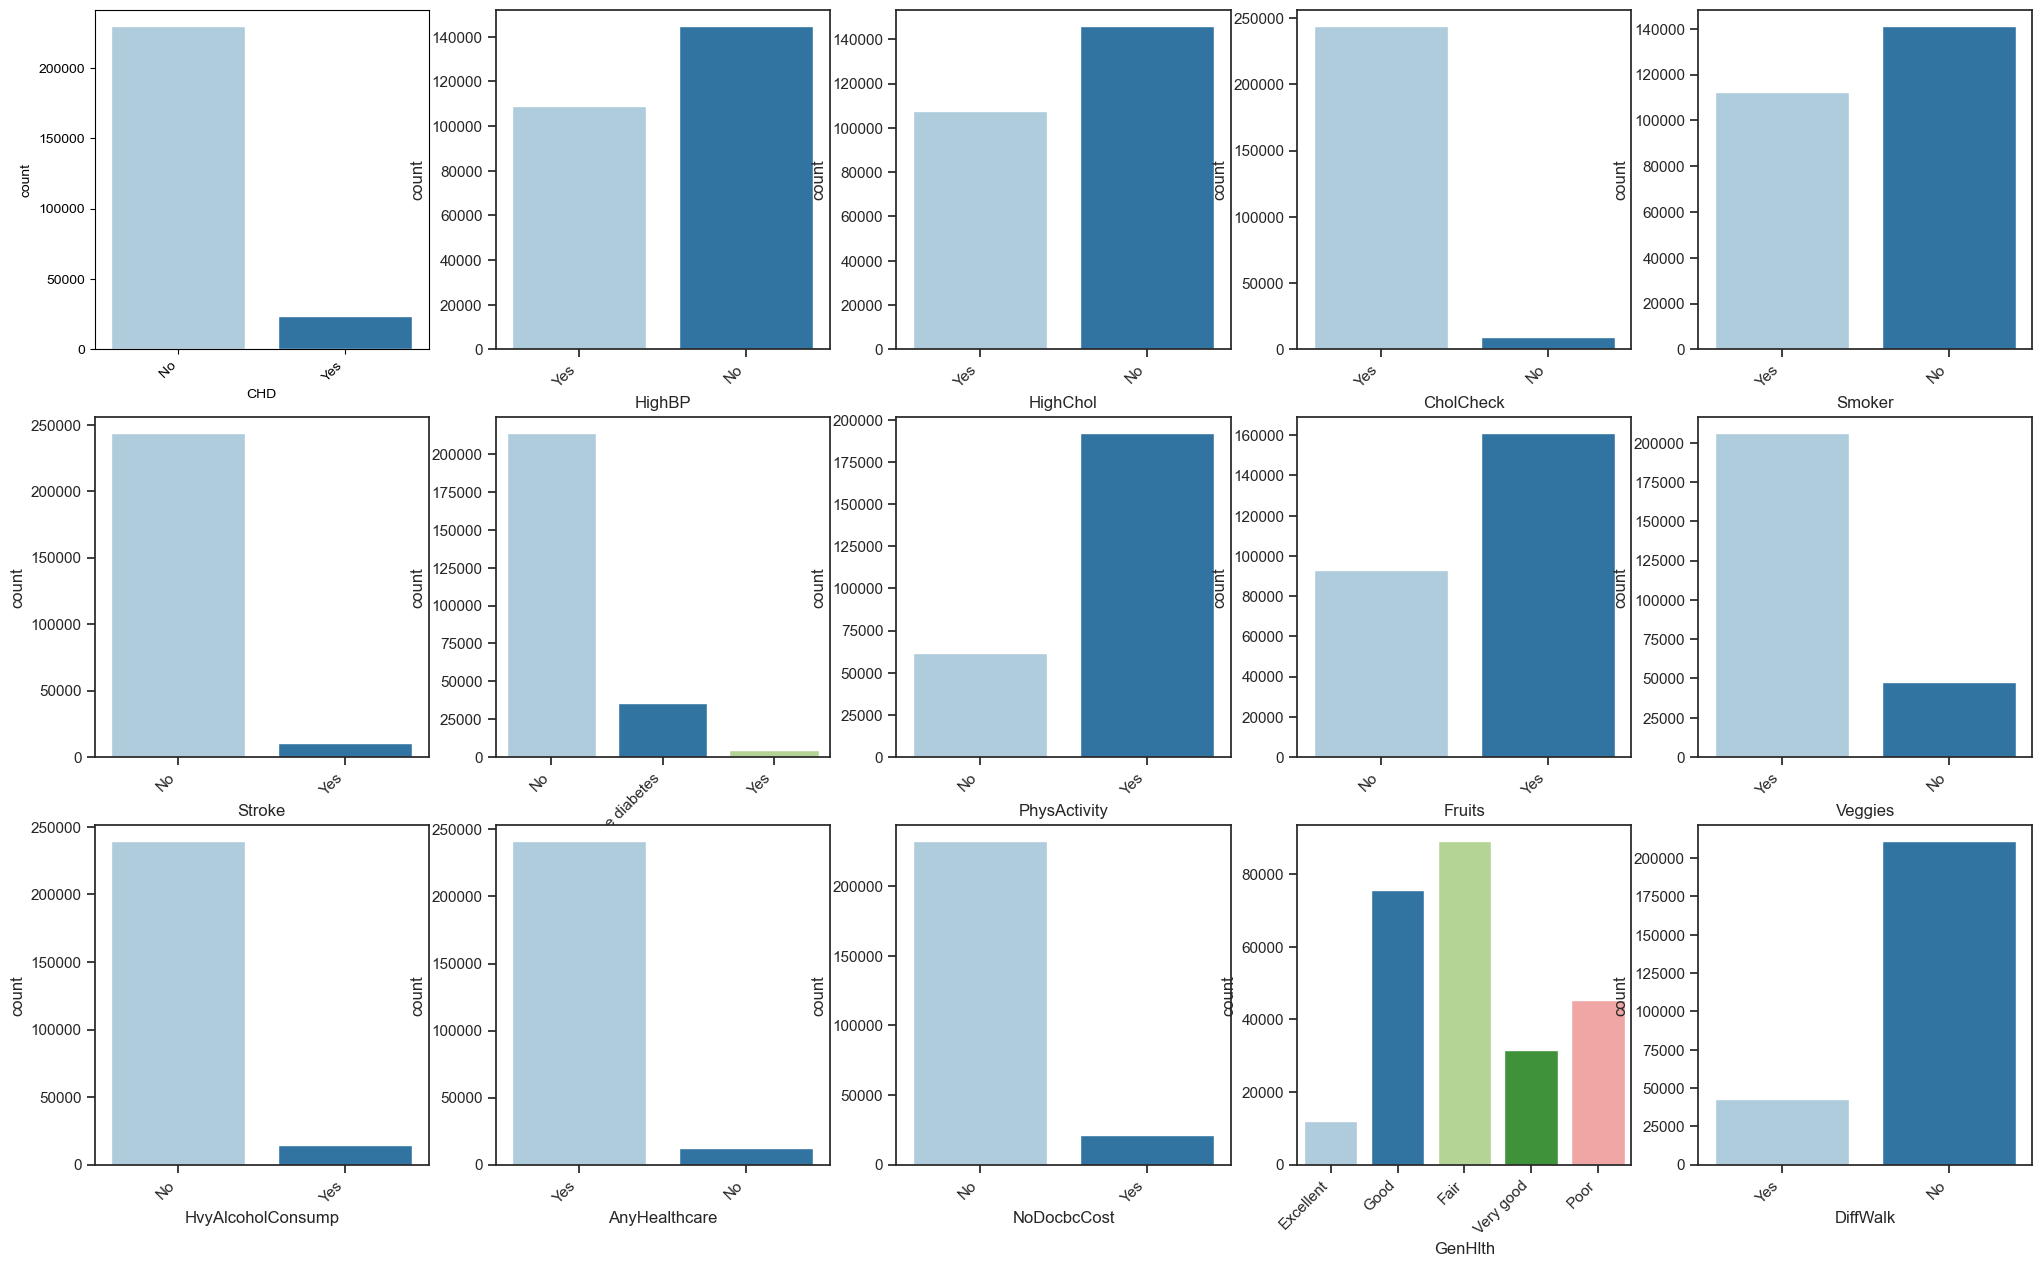

In [11]:
# import matplotlib and seaborn for visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Univariate visualization of categorical features
def categorical_feature_func():
  i = 1
  plt.figure(figsize = (25,15))
  for feature in categorical_features:
      plt.subplot(3,5,i)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = df)#, hue = 'Stroke')#, color='#221C35') 
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

categorical_feature_func()

In [15]:
df[df['CHD']=='Yes']['CHD'].count()/df['CHD'].count()
df[df['HighBP']=='Yes']['CHD'].count()/df['HighBP'].count()

0.4290011037527594

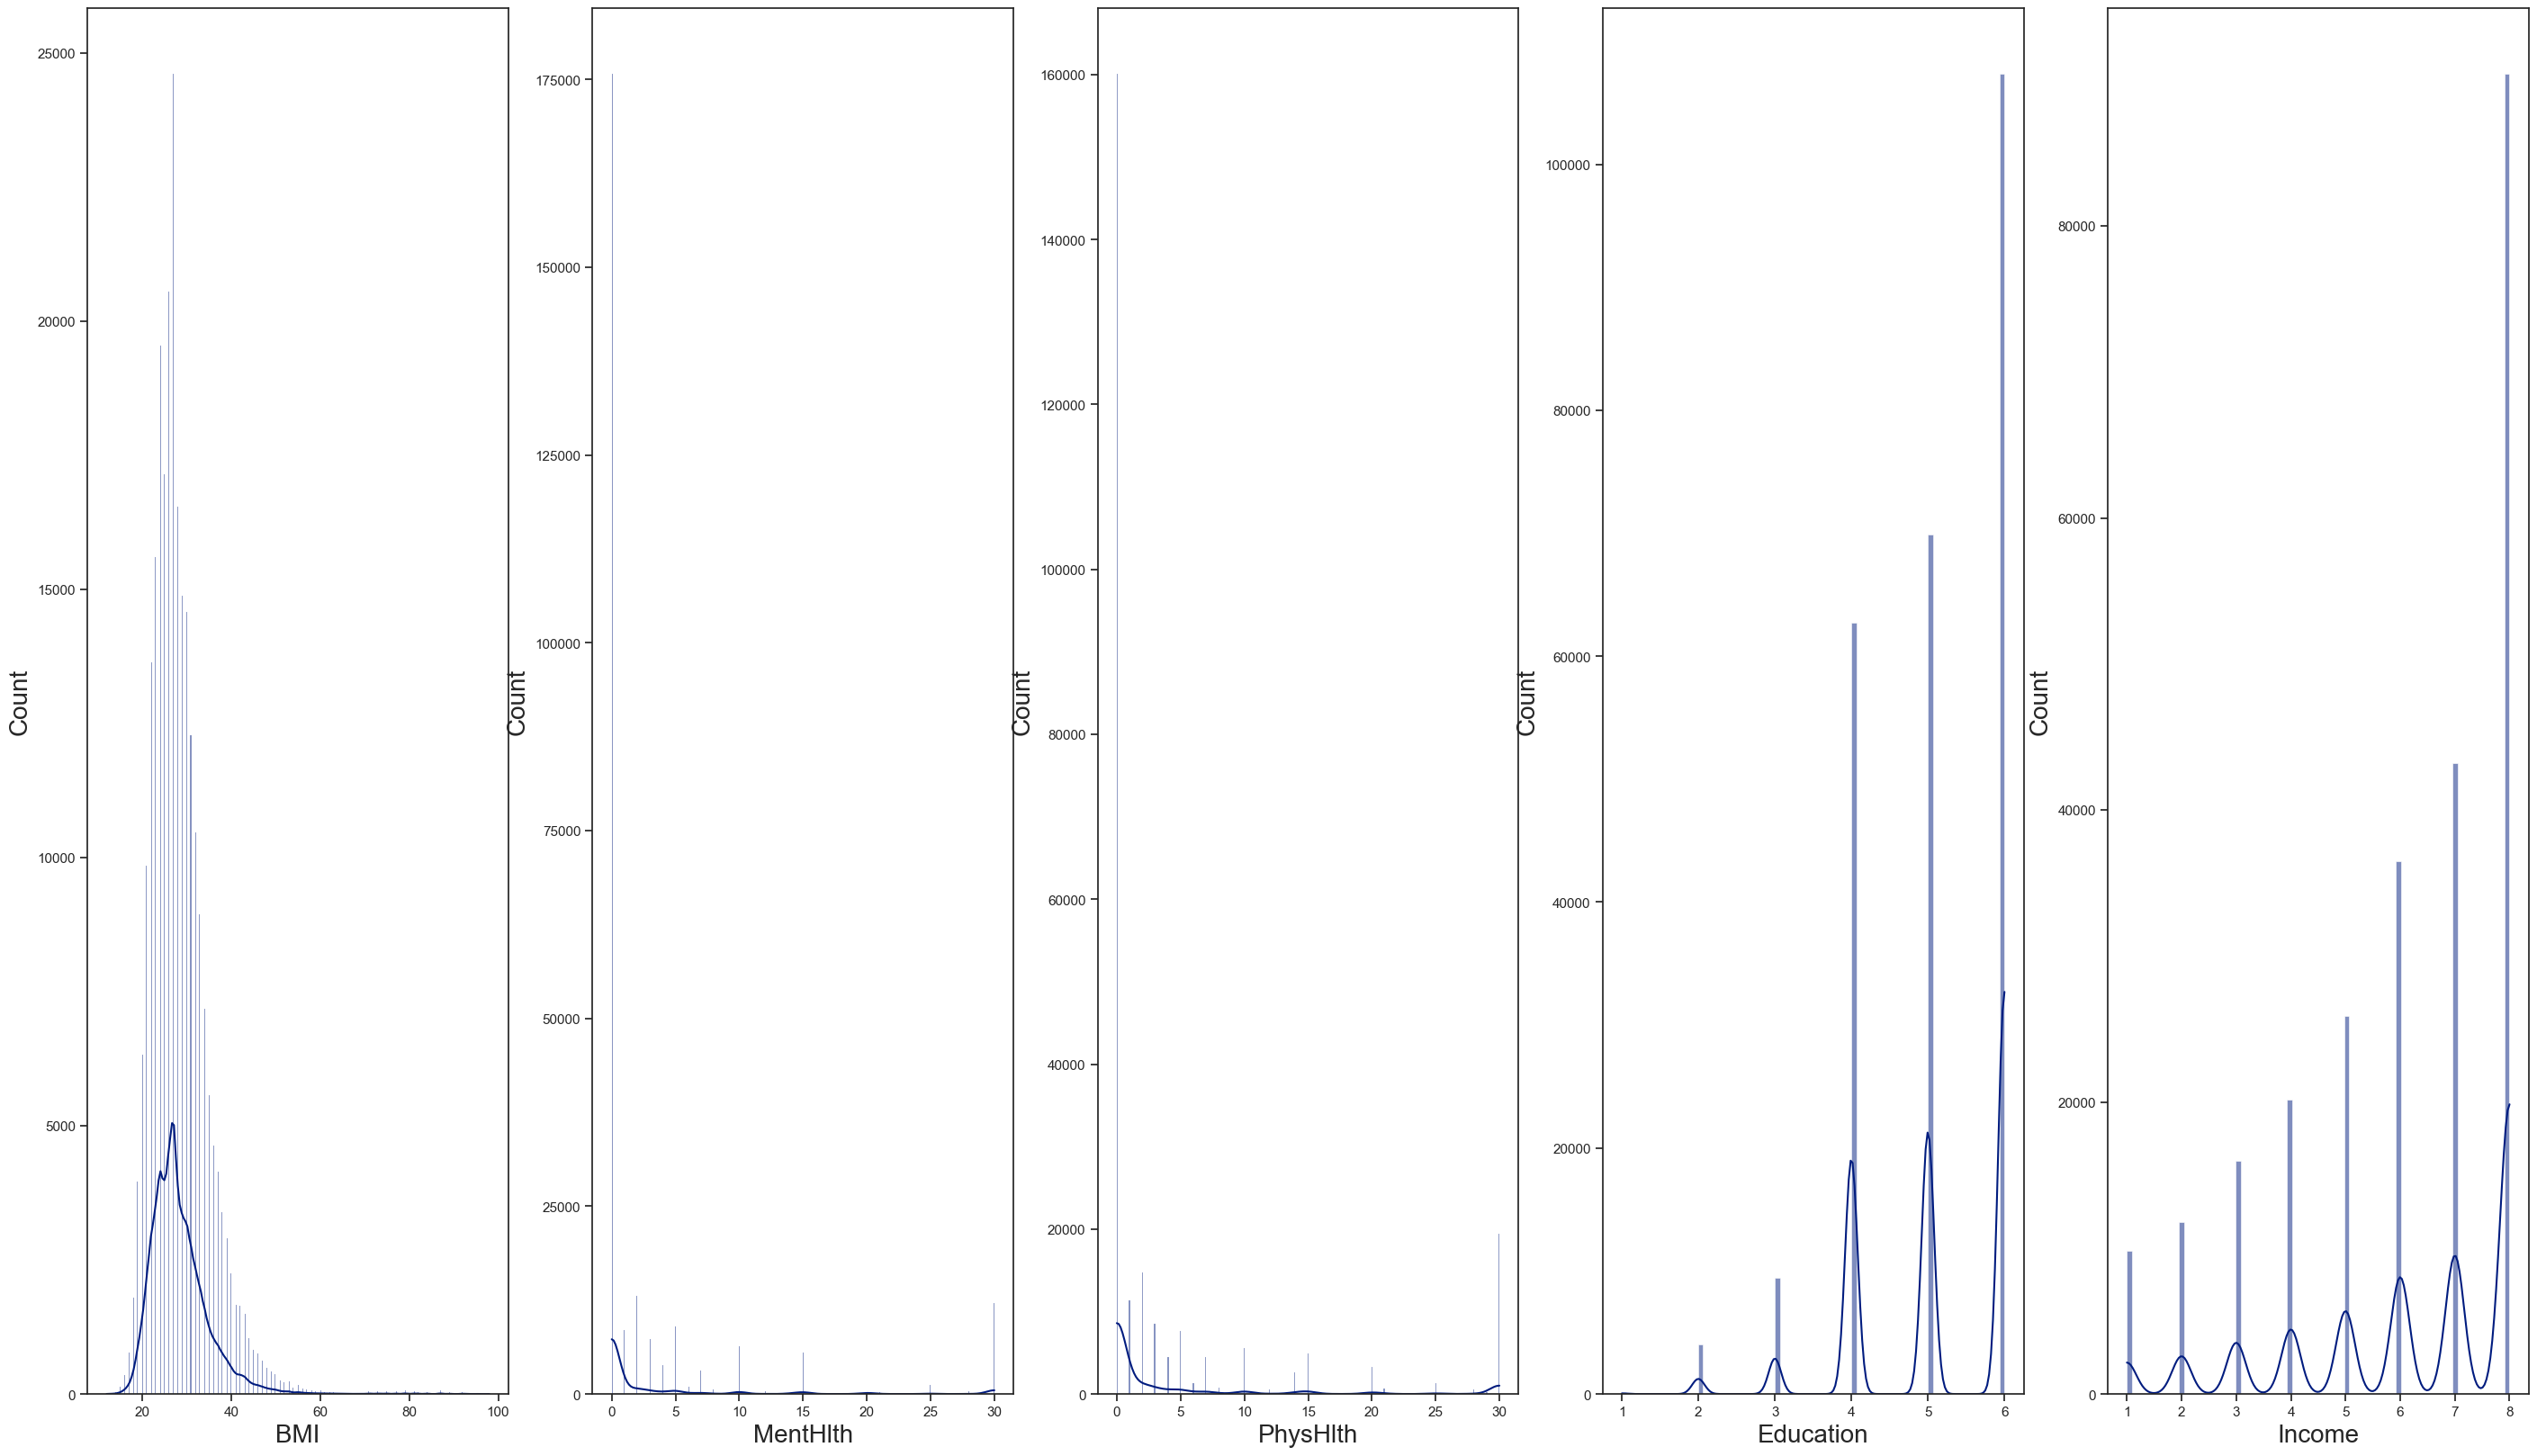

In [36]:
# Univariate visualization of numerical features
def numeric_features_func():
  i=1
  plt.figure(figsize = (35,20))
  for feature in numeric_features.columns:
      plt.subplot(1,5,i)
      sns.set(palette='dark')
      sns.set_style("ticks")
      sns.histplot(df[feature],kde=True)
      plt.xlabel(feature,fontsize=20)
      plt.ylabel("Count",fontsize=20)
      i+=1

numeric_features_func()

ValueError: num must be 1 <= num <= 15, not 16

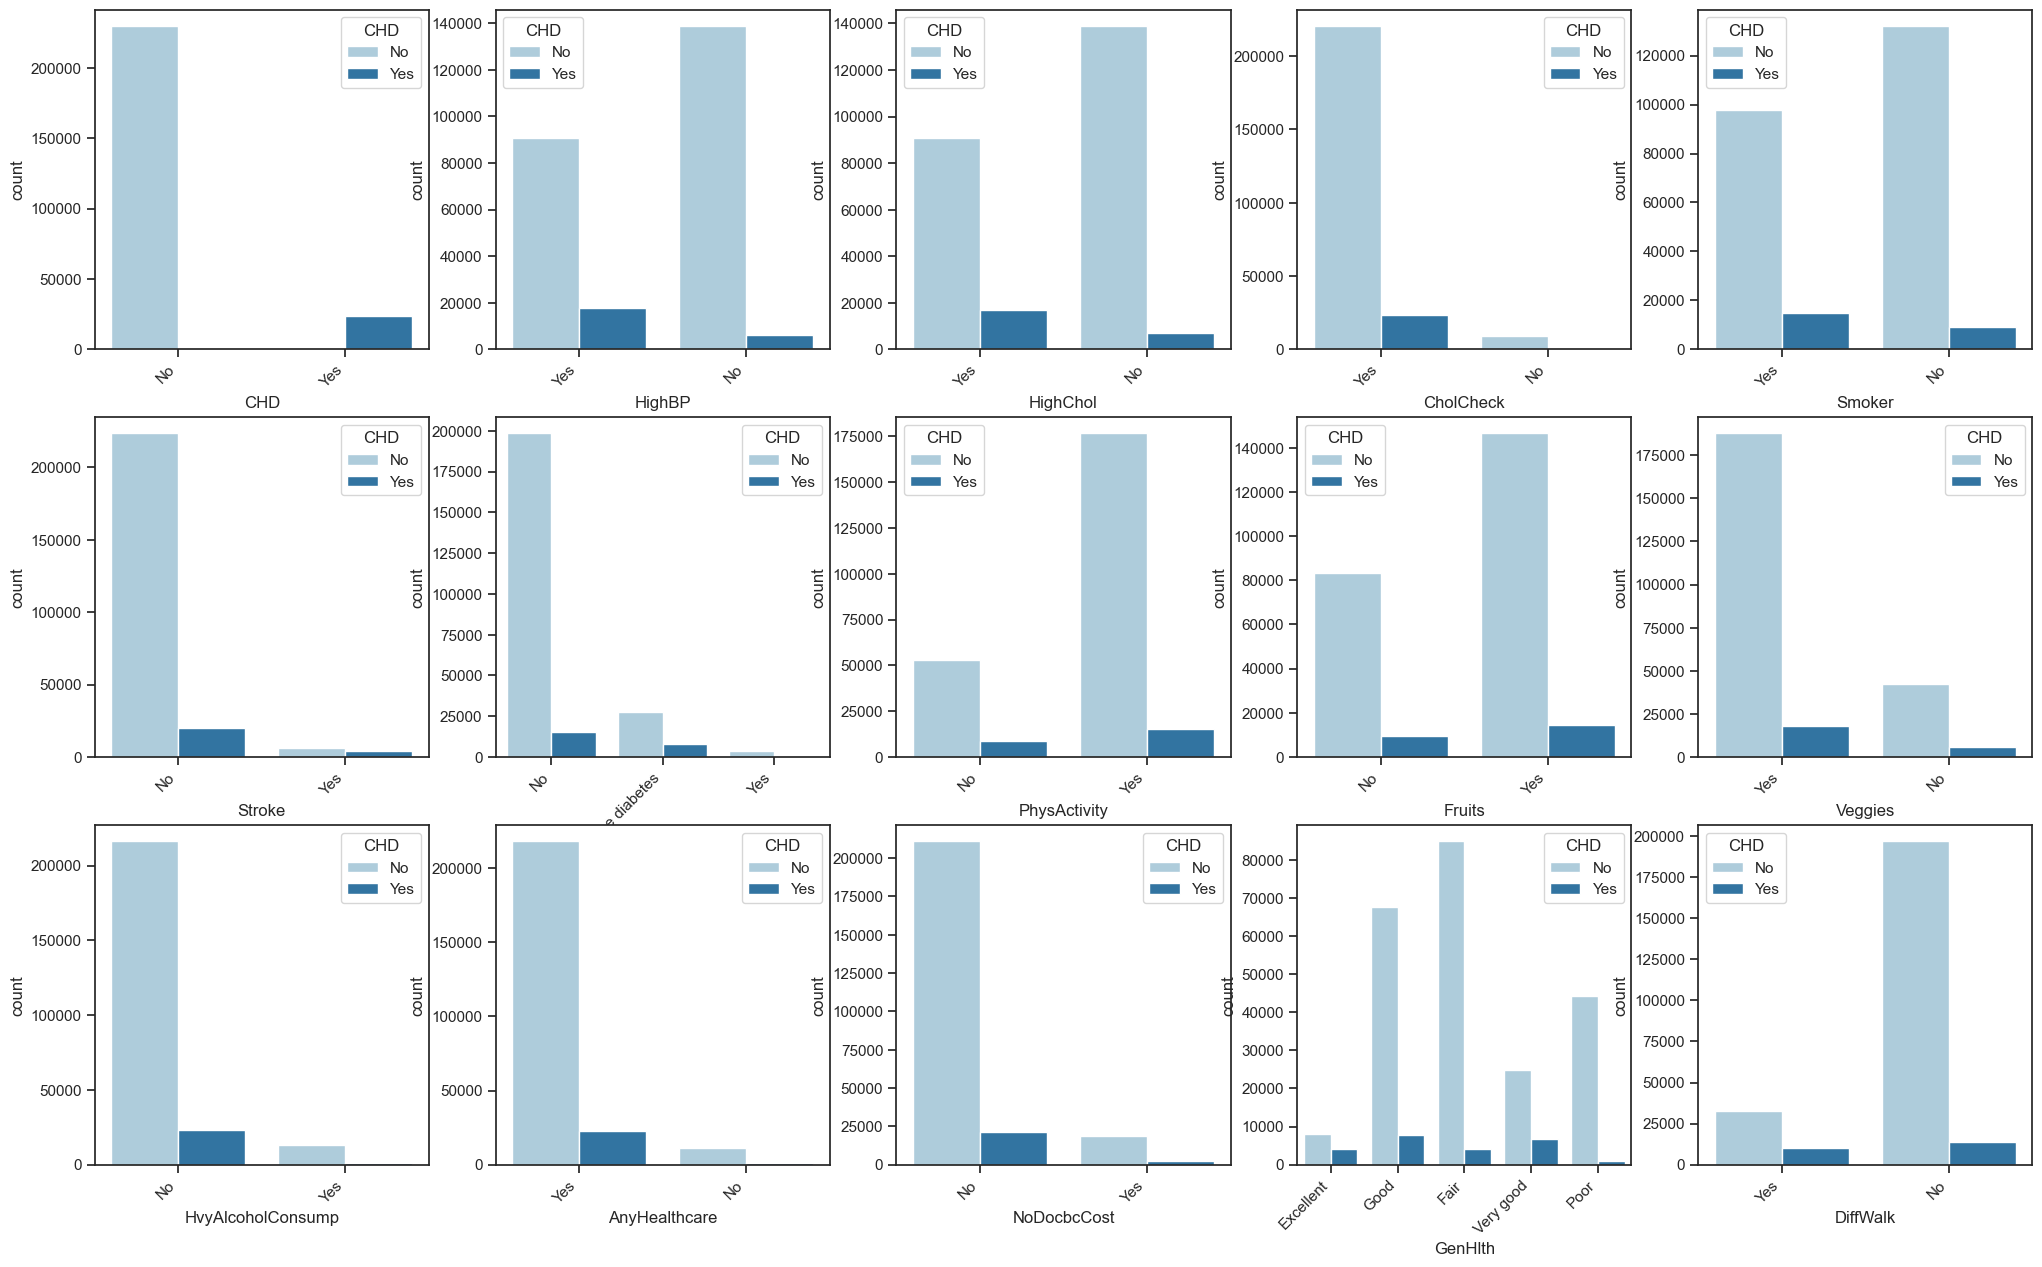

In [20]:
def categorical_feature_func():
  i = 1
  plt.figure(figsize = (25,15))
  for feature in categorical_features:
      plt.subplot(3,5,i)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = df, hue = 'CHD')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

categorical_feature_func()

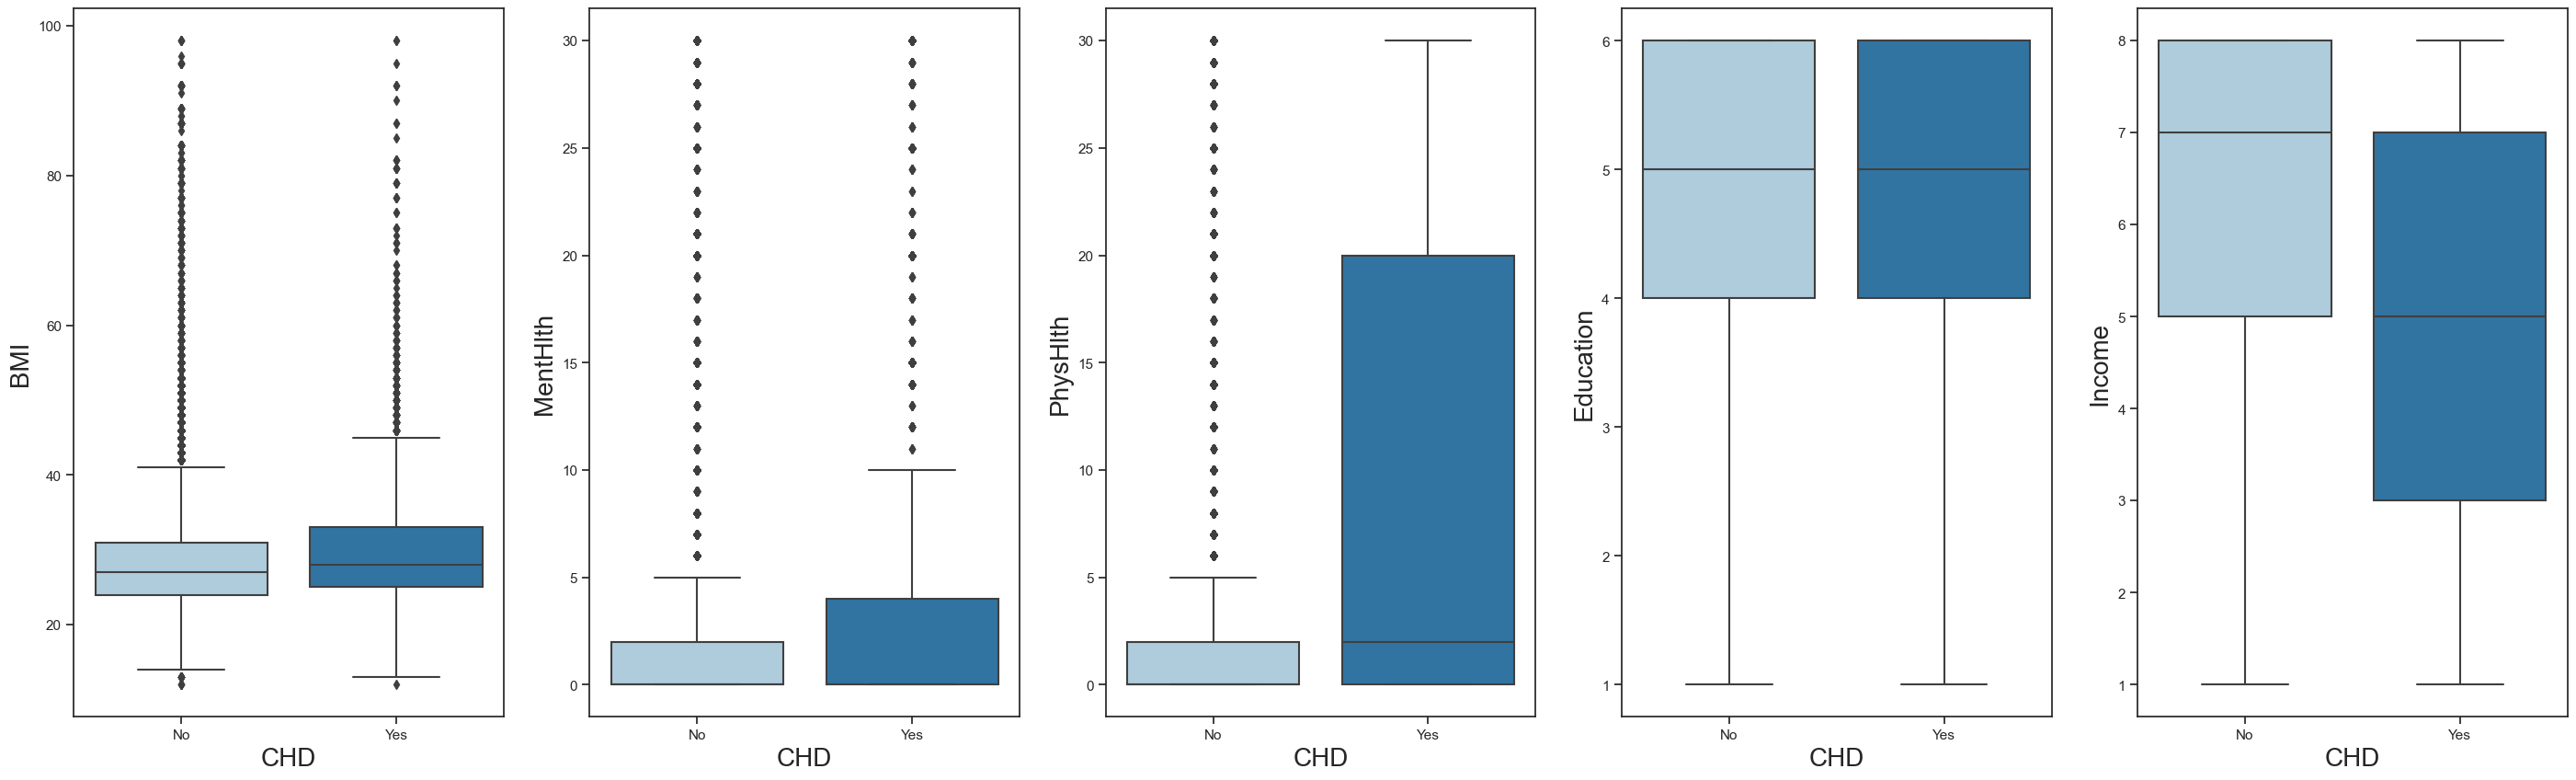

In [26]:
def numeric_features_func(f):
  i=1
  plt.figure(figsize=(35,10))
  sns.set(palette='Paired')
  sns.set_style("ticks")
  for feature in numeric_features:
      plt.subplot(1,5,i)
      sns.boxplot(y=df[feature], x = df[f])
      plt.ylabel(feature, fontsize=20)
      plt.xlabel(f, fontsize=20)  # Set xlabel and adjust its size
      i+=1

numeric_features_func('CHD')

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')


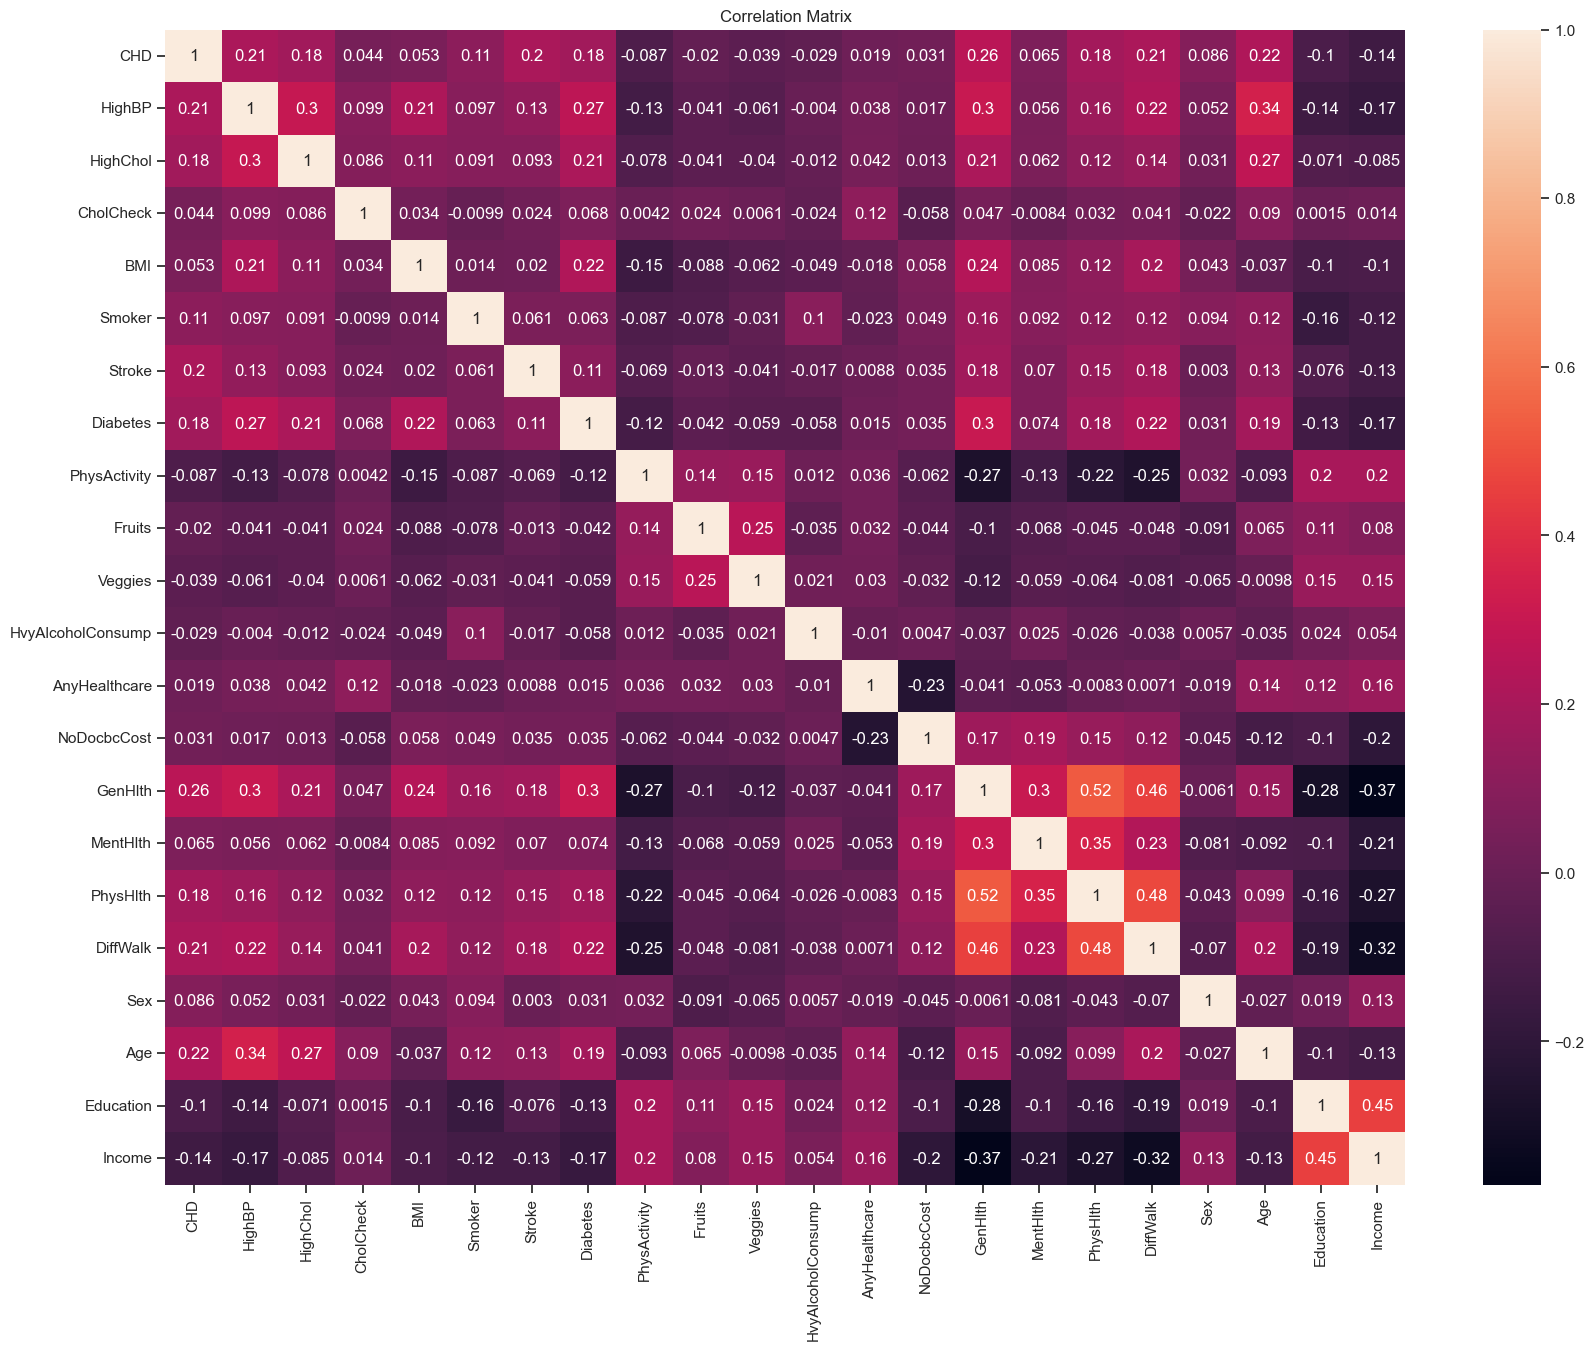

In [49]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Membuat heatmap untuk memvisualisasikan korelasi
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')

# Menampilkan plot
plt.show()

In [36]:
# Original models
dt_f1 = f1_score(y_test, dt_model.predict(X_test))
dt_recall = recall_score(y_test, dt_model.predict(X_test))

ada_f1 = f1_score(y_test, ada_model.predict(X_test))
ada_recall = recall_score(y_test, ada_model.predict(X_test))

rf_f1 = f1_score(y_test, rf_model.predict(X_test))
rf_recall = recall_score(y_test, rf_model.predict(X_test))

nb_f1 = f1_score(y_test, nb_model.predict(X_test))
nb_recall = recall_score(y_test, nb_model.predict(X_test))

knn_f1 = f1_score(y_test, knn_model.predict(X_test))
knn_recall = recall_score(y_test, knn_model.predict(X_test))

# Models with SMOTE
dt_smote_f1 = f1_score(y_test, dt_smote_model.predict(X_test))
dt_smote_recall = recall_score(y_test, dt_smote_model.predict(X_test))

ada_smote_f1 = f1_score(y_test, ada_smote_model.predict(X_test))
ada_smote_recall = recall_score(y_test, ada_smote_model.predict(X_test))

rf_smote_f1 = f1_score(y_test, rf_smote_model.predict(X_test))
rf_smote_recall = recall_score(y_test, rf_smote_model.predict(X_test))

nb_smote_f1 = f1_score(y_test, nb_smote_model.predict(X_test))
nb_smote_recall = recall_score(y_test, nb_smote_model.predict(X_test))

knn_smote_f1 = f1_score(y_test, knn_smote_model.predict(X_test))
knn_smote_recall = recall_score(y_test, knn_smote_model.predict(X_test))


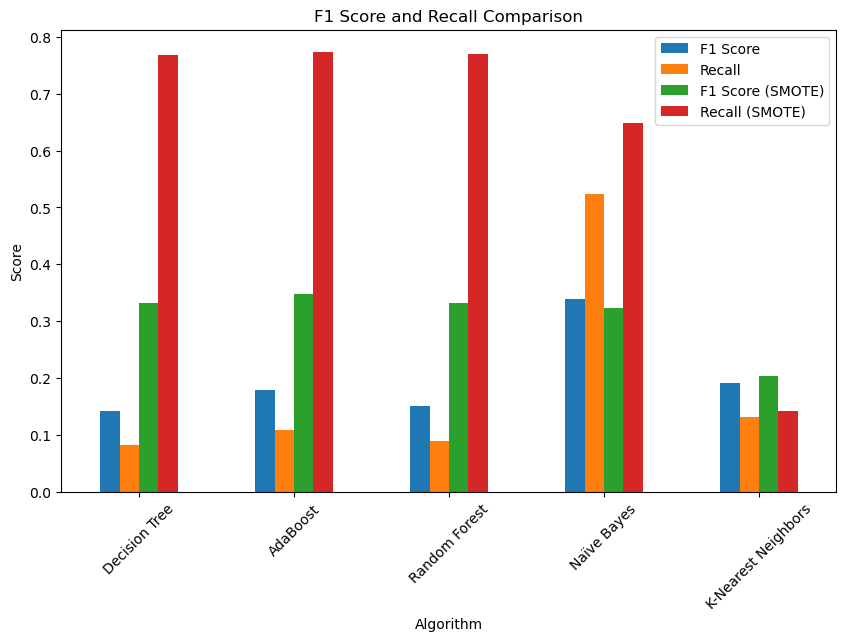

In [37]:
# Create a DataFrame to store the F1 score and Recall values
metrics = pd.DataFrame({
    'F1 Score': [dt_f1, ada_f1, rf_f1, nb_f1, knn_f1],
    'Recall': [dt_recall, ada_recall, rf_recall, nb_recall, knn_recall],
    'F1 Score (SMOTE)': [dt_smote_f1, ada_smote_f1, rf_smote_f1, nb_smote_f1, knn_smote_f1],
    'Recall (SMOTE)': [dt_smote_recall, ada_smote_recall, rf_smote_recall, nb_smote_recall, knn_smote_recall]
}, index=['Decision Tree', 'AdaBoost', 'Random Forest', 'Naïve Bayes', 'K-Nearest Neighbors'])

# Plot the bar chart
metrics.plot(kind='bar', figsize=(10, 6))
plt.title('F1 Score and Recall Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


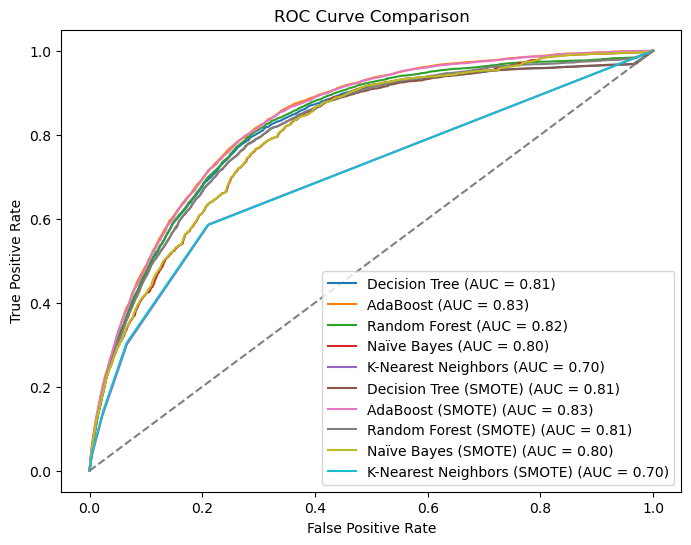

In [38]:
# Function to plot the ROC curve
def plot_roc_curve(fpr, tpr, auc_score, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')

# Calculate and plot ROC curve for each model
plt.figure(figsize=(8, 6))

# Original models
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
dt_auc = auc(dt_fpr, dt_tpr)
plot_roc_curve(dt_fpr, dt_tpr, dt_auc, 'Decision Tree')

ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada_model.predict_proba(X_test)[:, 1])
ada_auc = auc(ada_fpr, ada_tpr)
plot_roc_curve(ada_fpr, ada_tpr, ada_auc, 'AdaBoost')

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)
plot_roc_curve(rf_fpr, rf_tpr, rf_auc, 'Random Forest')

nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
nb_auc = auc(nb_fpr, nb_tpr)
plot_roc_curve(nb_fpr, nb_tpr, nb_auc, 'Naïve Bayes')

knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
knn_auc = auc(knn_fpr, knn_tpr)
plot_roc_curve(knn_fpr, knn_tpr, knn_auc, 'K-Nearest Neighbors')

# Models with SMOTE
dt_smote_fpr, dt_smote_tpr, dt_smote_thresholds = roc_curve(y_test, dt_smote_model.predict_proba(X_test)[:, 1])
dt_smote_auc = auc(dt_smote_fpr, dt_smote_tpr)
plot_roc_curve(dt_smote_fpr, dt_smote_tpr, dt_smote_auc, 'Decision Tree (SMOTE)')

ada_smote_fpr, ada_smote_tpr, ada_smote_thresholds = roc_curve(y_test, ada_smote_model.predict_proba(X_test)[:, 1])
ada_smote_auc = auc(ada_smote_fpr, ada_smote_tpr)
plot_roc_curve(ada_smote_fpr, ada_smote_tpr, ada_smote_auc, 'AdaBoost (SMOTE)')

rf_smote_fpr, rf_smote_tpr, rf_smote_thresholds = roc_curve(y_test, rf_smote_model.predict_proba(X_test)[:, 1])
rf_smote_auc = auc(rf_smote_fpr, rf_smote_tpr)
plot_roc_curve(rf_smote_fpr, rf_smote_tpr, rf_smote_auc, 'Random Forest (SMOTE)')

nb_smote_fpr, nb_smote_tpr, nb_smote_thresholds = roc_curve(y_test, nb_smote_model.predict_proba(X_test)[:, 1])
nb_smote_auc = auc(nb_smote_fpr, nb_smote_tpr)
plot_roc_curve(nb_smote_fpr, nb_smote_tpr, nb_smote_auc, 'Naïve Bayes (SMOTE)')

knn_smote_fpr, knn_smote_tpr, knn_smote_thresholds = roc_curve(y_test, knn_smote_model.predict_proba(X_test)[:, 1])
knn_smote_auc = auc(knn_smote_fpr, knn_smote_tpr)
plot_roc_curve(knn_smote_fpr, knn_smote_tpr, knn_smote_auc, 'K-Nearest Neighbors (SMOTE)')

# Plot the ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


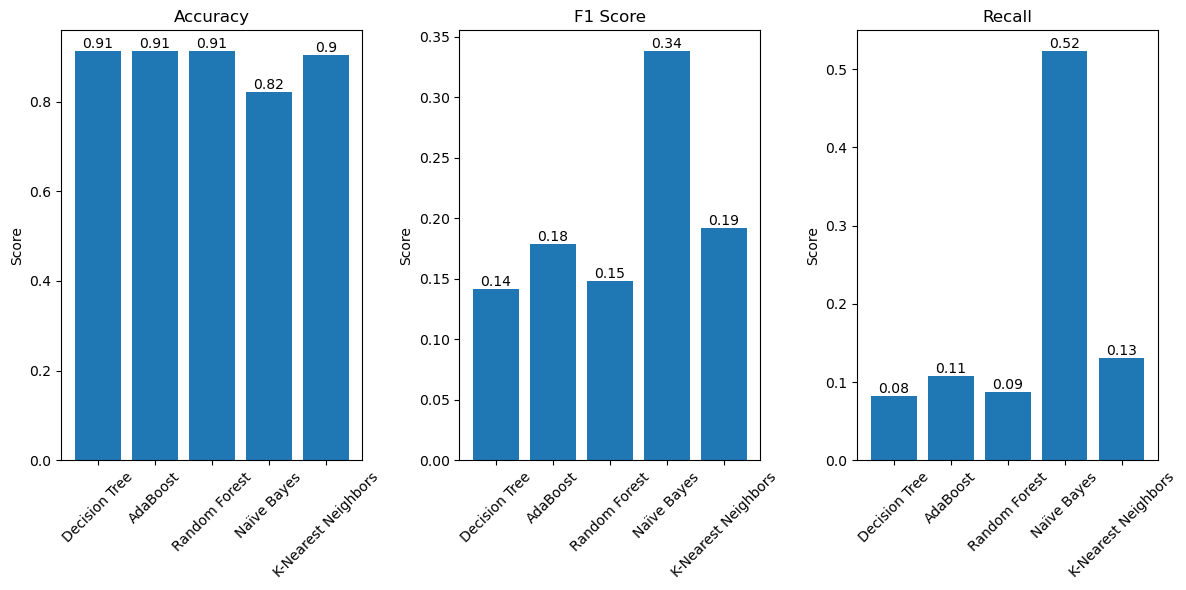

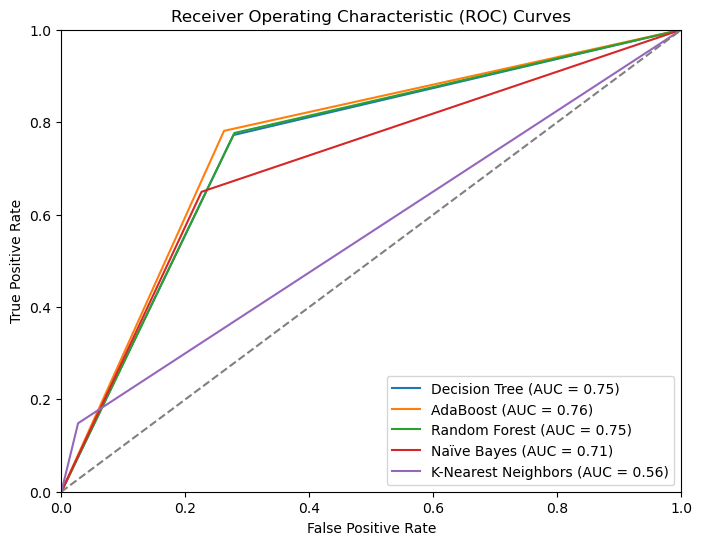

In [39]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = data
labels = data['CHD']
features = data.drop('CHD', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Perform SMOTE oversampling
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the algorithms
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naïve Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate the models
results = {}
roc_curves = {}

for algorithm, classifier in classifiers.items():
    # Original model
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results[algorithm] = {'Accuracy': accuracy, 'F1 Score': f1, 'Recall': recall}

    # SMOTE model
    classifier.fit(X_train_smote, y_train_smote)
    y_pred_smote = classifier.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_smote)
    roc_auc = auc(fpr, tpr)
    roc_curves[algorithm] = (fpr, tpr, roc_auc)

# Visualize the results
plt.figure(figsize=(12, 6))

# Bar chart for Accuracy
plt.subplot(1, 3, 1)
accuracies = [results[alg]['Accuracy'] for alg in results]
plt.bar(range(len(accuracies)), accuracies)
plt.xticks(range(len(accuracies)), list(results.keys()), rotation=45)
plt.title('Accuracy')
plt.ylabel('Score')
for i, acc in enumerate(accuracies):
    plt.text(i, acc, str(round(acc, 2)), ha='center', va='bottom')

# Bar chart for F1 Score
plt.subplot(1, 3, 2)
f1_scores = [results[alg]['F1 Score'] for alg in results]
plt.bar(range(len(f1_scores)), f1_scores)
plt.xticks(range(len(f1_scores)), list(results.keys()), rotation=45)
plt.title('F1 Score')
plt.ylabel('Score')
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1, str(round(f1, 2)), ha='center', va='bottom')

# Bar chart for Recall
plt.subplot(1, 3, 3)
recalls = [results[alg]['Recall'] for alg in results]
plt.bar(range(len(recalls)), recalls)
plt.xticks(range(len(recalls)), list(results.keys()), rotation=45)
plt.title('Recall')
plt.ylabel('Score')
for i, rec in enumerate(recalls):
    plt.text(i, rec, str(round(rec, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(8, 6))

for algorithm, roc_curve_data in roc_curves.items():
    fpr, tpr, roc_auc = roc_curve_data
    plt.plot(fpr, tpr, label=f'{algorithm} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN


In [42]:
# Assuming the dataset is in a CSV file named 'data.csv'
df = data

# Separate features and target variable
X = df.drop('CHD', axis=1)
y = df['CHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, f1, recall

# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naïve Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluate models on original data
results_original = {}
for name, model in models.items():
    accuracy, f1, recall = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    results_original[name] = {'Accuracy': accuracy, 'F1 Score': f1, 'Recall': recall}

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Evaluate models on SMOTE data
results_smote = {}
for name, model in models.items():
    accuracy, f1, recall = evaluate_model(model, X_train_smote, y_train_smote, X_test_scaled, y_test)
    results_smote[name] = {'Accuracy': accuracy, 'F1 Score': f1, 'Recall': recall}

# Apply NearMiss to balance the classes
near_miss = NearMiss()
X_train_near_miss, y_train_near_miss = near_miss.fit_resample(X_train_scaled, y_train)

# Evaluate models on NearMiss data
results_near_miss = {}
for name, model in models.items():
    accuracy, f1, recall = evaluate_model(model, X_train_near_miss, y_train_near_miss, X_test_scaled, y_test)
    results_near_miss[name] = {'Accuracy': accuracy, 'F1 Score': f1, 'Recall': recall}

# Apply SMOTE + ENN to balance the classes
smote_enn = SMOTEENN(random_state=42)
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train_scaled, y_train)

# Evaluate models on SMOTE + ENN data
results_smote_enn = {}
for name, model in models.items():
    accuracy, f1, recall = evaluate_model(model, X_train_smote_enn, y_train_smote_enn, X_test_scaled, y_test)
    results_smote_enn[name] = {'Accuracy': accuracy, 'F1 Score': f1, 'Recall': recall}


In [ ]:
def plot_bar_chart(results, title):
    metrics = list(results.keys())
    accuracy_values = [result['Accuracy'] for result in results.values()]
    f1_values = [result['F1 Score'] for result in results.values()]
    recall_values = [result['Recall'] for result in results.values()]

    x = np.arange(len(metrics))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width, accuracy_values, width, label='Accuracy')
    ax.bar(x, f1_values, width, label='F1 Score')
    ax.bar(x + width, recall_values, width, label='Recall')

    ax.set_xlabel('Algorithms')
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Display values on top of bars
    for i, v in enumerate(accuracy_values):
        ax.text(i - width, v + 0.01, str(round(v, 2)), ha='center', fontweight='bold')
    for i, v in enumerate(f1_values):
        ax.text(i, v + 0.01, str(round(v, 2)), ha='center', fontweight='bold')
    for i, v in enumerate(recall_values):
        ax.text(i + width, v + 0.01, str(round(v, 2)), ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

# Visualize metrics for each dataset
plot_bar_chart(results_original, 'Metrics on Original Data')
plot_bar_chart(results_smote, 'Metrics on SMOTE Data')
plot_bar_chart(results_near_miss, 'Metrics on NearMiss Data')
plot_bar_chart(results_smote_enn, 'Metrics on SMOTE + ENN Data')


In [ ]:
def plot_roc_curve(model, X_test, y_test, label):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Initialize the models with the best hyperparameters
models_optimized = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5),
    'Naïve Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Fit and plot ROC curves on original data
plt.figure(figsize=(10, 6))
for name, model in models_optimized.items():
    model.fit(X_train_scaled, y_train)
    plot_roc_curve(model, X_test_scaled, y_test, label=name)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves on Original Data')
plt.legend(loc='lower right')
plt.show()

# Fit and plot ROC curves on SMOTE data
plt.figure(figsize=(10, 6))
for name, model in models_optimized.items():
    model.fit(X_train_smote, y_train_smote)
    plot_roc_curve(model, X_test_scaled, y_test, label=name)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves on SMOTE Data')
plt.legend(loc='lower right')
plt.show()

# Fit and plot ROC curves on NearMiss data
plt.figure(figsize=(10, 6))
for name, model in models_optimized.items():
    model.fit(X_train_near_miss, y_train_near_miss)
    plot_roc_curve(model, X_test_scaled, y_test, label=name)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves on NearMiss Data')
plt.legend(loc='lower right')
plt.show()

# Fit and plot ROC curves on SMOTE + ENN data
plt.figure(figsize=(10, 6))
for name, model in models_optimized.items():
    model.fit(X_train_smote_enn, y_train_smote_enn)
    plot_roc_curve(model, X_test_scaled, y_test, label=name)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves on SMOTE + ENN Data')
plt.legend(loc='lower right')
plt.show()
